<a href="https://colab.research.google.com/github/najnin26/Quantum-Machine-Learning/blob/main/Image_Classification_on_Fashion_MNIST_with_TensorFlow_Quantum_and_Cirq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Installing required packages***

In [2]:
# installing TensorFLow Version 2.3.1
from IPython.display import clear_output
!pip install -q tensorflow==2.15.0
clear_output()

In [3]:
# install tensorflow quantum
!pip3 install -U tensorflow-quantum
clear_output()

In [4]:
#install cirq
!pip install cirq


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

# ***Importing the dataset and required packages***

In [5]:
import tensorflow as tf

# Data Processing tools
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd


# QML tools
import tensorflow_quantum as tfq
import cirq
import sympy

# Visualization Tools
from cirq.contrib.svg import SVGCircuit
import matplotlib.pyplot as plt

In [6]:
#Lets print the version of cirq and tfq that we will use
print("We are using the TensorFlow-Quantum version {}".format(tfq.__version__))
print("We are using the Cirq version {}".format(cirq.__version__))

We are using the TensorFlow-Quantum version 0.7.2
We are using the Cirq version 1.4.1


In [7]:
#importing the Fashion MNIST dataset from keras
from tensorflow.keras.datasets import fashion_mnist as dataset

In [8]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (60000, 28, 28)
The shape of the y_train is (60000,)
The shape of the X_test is (10000, 28, 28)
The shape of the y_test is (10000,)


# ***Preprocessing the Dataset***

In [10]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
y_train_series = pd.Series(y_train) # convert the NumPy array to a Pandas Series
y_train_series.value_counts()

,count
9,6000
0,6000
3,6000
2,6000
7,6000
5,6000
1,6000
6,6000
4,6000
8,6000


In [13]:
def filter_data(x, y):
  """
  Helper Function to filter the dataset
  """
  #filter the data using labels
  keep = (y == 5) | (y == 9)
  x, y = x[keep], y[keep]

  # convert labels to boolean
  # y = True if y==5
  # y = False if y==9
  y = y == 5
  return x,y

In [14]:
#Filter the train set
X_train, y_train = filter_data(X_train, y_train)

#Filter the test_set
X_test, y_test = filter_data(X_test, y_test)

In [15]:
# Let's have a look at the shapes of train and test data
print("The shape of the X_train is {}".format( X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_test is {}".format(X_test.shape))
print("The shape of the y_test is {}".format(y_test.shape))

The shape of the X_train is (12000, 28, 28)
The shape of the y_train is (12000,)
The shape of the X_test is (2000, 28, 28)
The shape of the y_test is (2000,)


The First Image has the label False


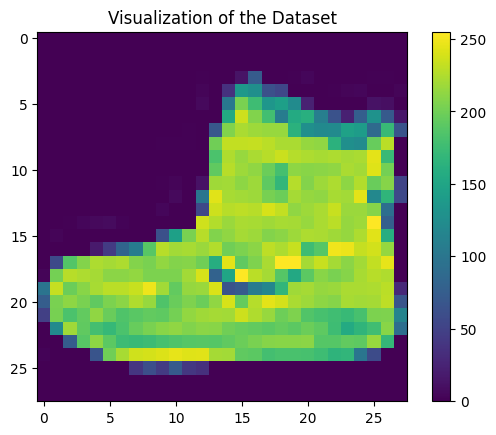

In [16]:
#Let's have a look at the first image from our X_train and the corresponding label from y_train
print("The First Image has the label {}".format(y_train[0]))
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [17]:
#Normalizing the train and test image data
X_train = X_train/255.0
X_test = X_test/ 255.0

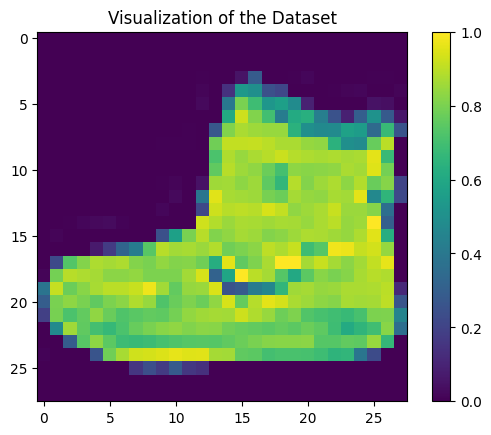

In [18]:
#Let's again have a look at the first image from our X_train and
#see if we have successfully normalized the datasets
plt.imshow(X_train[0])
plt.colorbar()
plt.title('Visualization of the Dataset')
plt.show()

In [19]:
#Before proceeding, we need to reshape our images in the dataset
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))

In [20]:
# Downscaling the images
X_train = tf.image.resize(X_train, (2,2)).numpy()
X_test = tf.image.resize(X_test, (2,2)).numpy()

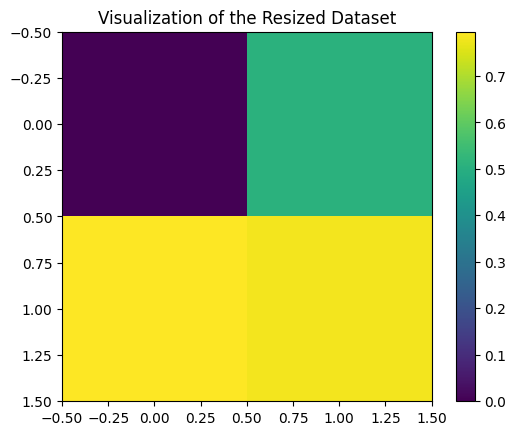

In [21]:
#Let's again have a look at the first image from our resized X_train
plt.imshow(X_train[0,:,:,0])
plt.colorbar()
plt.title('Visualization of the Resized Dataset')
plt.show()

In [22]:
#Splitting the training fdataset into train and validation datasets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.15, random_state=0)

In [23]:
print("The shape of the X_train is {}".format(X_train.shape))
print("The shape of the y_train is {}".format(y_train.shape))
print("The shape of the X_valid is {}".format(X_valid.shape))
print("The shape of the y_valid is {}".format(y_valid.shape))

The shape of the X_train is (10200, 2, 2, 1)
The shape of the y_train is (10200,)
The shape of the X_valid is (1800, 2, 2, 1)
The shape of the y_valid is (1800,)


# ***Data Encoding***
Steps involved in Data Encoding:

1. Processing pixel values for binary encoding

2. Converting Cirq Circuits to tfq tensors




**Step 1: Processing Pixel Values for Binary Encoding**

In [24]:
# FLattening the images
X_train = X_train.reshape(X_train.shape[0], *(1,4,1))
X_valid = X_valid.reshape(X_valid.shape[0], *(1,4,1))
X_test = X_test.reshape(X_test.shape[0], *(1,4,1))

## Processing X_train

In [25]:
#Let's have a look on the first example
print(X_train[0])

[[[0.        ]
  [0.41568628]
  [0.7137255 ]
  [0.73921573]]]


In [26]:
def binary_encode(X,threshold=0.5):
  """
  Encodes the given datset to use binary encoding

  Parameters:
  X(array) : Image data to be processed for encoding
  threshold(float): Threshold for binary encoding, 0.5 by default

  Returns:
  encoded_images(array): Binary encoded Image Data

  """
  encoded_images = list()
  for image in X:
    # pixel value is 1 if it's greater than threshold or else zero
    encoded_image = [1 if j>threshold else 0 for j in image[0]]
    encoded_images.append(encoded_image)
  return np.array(encoded_images)

In [27]:
X_train = binary_encode(X_train)

In [28]:
# Now, Let's have a look on the first example again
print(X_train[0])

[0 0 1 1]


In [29]:
print("The shape of the X_train is {}".format(X_train.shape))

The shape of the X_train is (10200, 4)


In [30]:
def create_circuit_from_image(encoded_image):
  """
  Returns a circuit for given encoded image

  Parameters:
  encoded_image (array): Encoded Image

  Returns:
  circuit (cirq.Circuit object): cirq circuit
  """
  qubits = cirq.GridQubit.rect(2,2)
  circuit = cirq.Circuit()
  for i, pixel in enumerate(encoded_image):
    if pixel:
      circuit.append(cirq.X(qubits[i]))
  return circuit

In [31]:
X_train = [create_circuit_from_image(encoded_image) for encoded_image in X_train]

In [32]:
# Let's have a look at the circuit for the first image
print(X_train[0])

(1, 0): ───X───

(1, 1): ───X───


**Step 2: Converting Cirq Circuits to tfq Tensors**

In [33]:
X_train_tfq = tfq.convert_to_tensor(X_train)

In [34]:
X_train_tfq[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'\n\x0e\n\x0ctfq_gate_set\x12\x99\x02\x08\x01\x12\x94\x02\n\x87\x01\n\x04\n\x02XP\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x16\n\x0econtrol_qubits\x12\x04\n\x02\x1a\x00\x12\x16\n\x0econtrol_values\x12\x04\n\x02\x1a\x00\x1a\x05\x12\x031_0\n\x87\x01\n\x04\n\x02XP\x12\x16\n\x0econtrol_qubits\x12\x04\n\x02\x1a\x00\x12\x16\n\x0econtrol_values\x12\x04\n\x02\x1a\x00\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x1a\x05\x12\x031_1'>

# Processing X_valid and X_test

In [35]:
X_valid = binary_encode(X_valid)
X_test = binary_encode(X_test)

In [36]:
X_valid = [create_circuit_from_image(encoded_image) for encoded_image in X_valid]
X_test = [create_circuit_from_image(encoded_image) for encoded_image in X_test]

In [37]:
X_valid_tfq = tfq.convert_to_tensor(X_valid)
X_test_tfq = tfq.convert_to_tensor(X_test)

## ***Quantum Neural Network***
Building the Quantum Neural Network involves two steps

- build a class that adds gates layer by layer

- define the QNN using the class from the above step

In [38]:
class QNN():
    def __init__(self, data_qubits, readout):
      self.data_qubits = data_qubits
      self.readout = readout

    def add_singleQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds single qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate
      Returns:
      None
      """
      for index in qubit_index:
        circuit.append(gate(self.data_qubits[index]))

    def add_twoQubit_gate(self,circuit, gate, qubit_index):
      """
      Adds two qubit gate to the circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      qubits(list): index of qubits to apply the gate
      Returns:
      None
      """
      if len(qubit_index)!=2:
        raise Exception("The length of the list of indices passed for two qubit \
        gate operations must be equal to two")
      circuit.append(gate(self.data_qubits[qubit_index[0]], self.data_qubits[qubit_index[1]]))

    def add_layer(self, circuit, gate, symbol_gate):
      """
      Adds New Gates/Layers to the Circuit
      Parameters:
      circuit(cirq.Circuit object): Cirq circuit
      gate(cirq gate): gate to append to the circuit
      symbol_gate(string): symbol for the gate
      Returns:
      None
      """
      for i, qubit in enumerate(self.data_qubits):
        symbol = sympy.Symbol(symbol_gate+ '-' + str(i))
        circuit.append(gate(qubit, self.readout)**symbol)

In [39]:
def create_qnn():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(2,2)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)         # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    qnn = QNN(
        data_qubits = data_qubits,
        readout=readout)

    """
    # Though we don't use single and double Qubit Gates in our Circuit, we provide
    # the methods "add_singleQubit_gate" and "add_twoQubit_gate" for our Class QNN
    # that can be used to add Single and Double Qubit Gates respectively.
    # An exmaple is shown below:

    #Add Hadamard Gates
    qnn.add_singleQubit_gate(circuit, cirq.H, [0,1,2,3])

    #Add CNOT gates
    qnn.add_twoQubit_gate(circuit, cirq.CNOT, [0, 1])
    qnn.add_twoQubit_gate(circuit, cirq.CNOT, [2, 3])
    """

    # Add the ising coupling XX gate
    qnn.add_layer(circuit, cirq.XX, "xx")
    qnn.add_layer(circuit, cirq.ZZ, "zz")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [40]:
qmodel, model_readout = create_qnn()

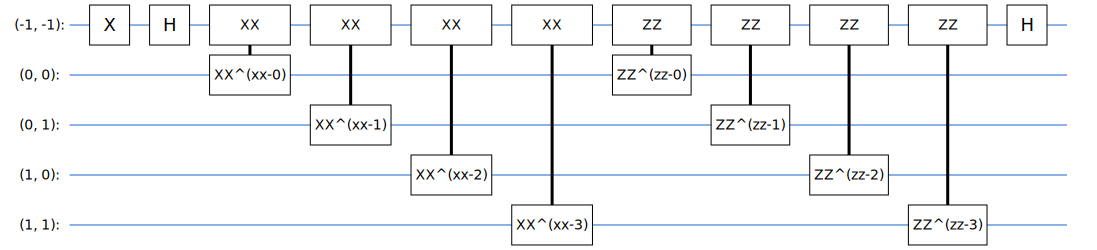

In [41]:
#Let's have a look at our Qauntum Circuit that will perform the classification
SVGCircuit(qmodel)

In [42]:
model = tf.keras.Sequential([

    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),


    # The PQC stands for Paramaterized Quantum Circuit
    # This returns the expectation value
    tfq.layers.PQC(qmodel, model_readout),
])

In [43]:
# To use Hinge Loss, we convert the labels to 1 and -1
y_train_h = np.array([1 if i==1 else -1 for i in y_train ])
y_valid_h = np.array([1 if i==1 else -1 for i in y_valid ])
y_test_h = np.array([1 if i==1 else -1 for i in y_test ])

In [44]:
# Let's have a look at the first label from the training dataset
print(y_train_h[0])

1


In [45]:
# Define the custom Hinge Accuracy
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

# ***Train the QNN***

In [46]:
model.compile(
    loss=tf.keras.losses.Hinge(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[hinge_accuracy])

In [47]:
qnn_history = model.fit(
      X_train_tfq, y_train_h,
      batch_size=64,
      epochs=10,
      verbose=1,
      validation_data=(X_valid_tfq, y_valid_h))

Epoch 1/10
160/160 [==============================] - 11s 63ms/step - loss: 1.0159 - hinge_accuracy: 0.4454 - val_loss: 0.7276 - val_hinge_accuracy: 0.7522
Epoch 2/10
160/160 [==============================] - 9s 54ms/step - loss: 0.6127 - hinge_accuracy: 0.7534 - val_loss: 0.4756 - val_hinge_accuracy: 0.7915
Epoch 3/10
160/160 [==============================] - 9s 58ms/step - loss: 0.4980 - hinge_accuracy: 0.7599 - val_loss: 0.4271 - val_hinge_accuracy: 0.7915
Epoch 4/10
160/160 [==============================] - 10s 61ms/step - loss: 0.4757 - hinge_accuracy: 0.7604 - val_loss: 0.4164 - val_hinge_accuracy: 0.7915
Epoch 5/10
160/160 [==============================] - 9s 55ms/step - loss: 0.4555 - hinge_accuracy: 0.7600 - val_loss: 0.4001 - val_hinge_accuracy: 0.7915
Epoch 6/10
160/160 [==============================] - 9s 56ms/step - loss: 0.4242 - hinge_accuracy: 0.8095 - val_loss: 0.3896 - val_hinge_accuracy: 0.8626
Epoch 7/10
160/160 [==============================] - 10s 62ms/step 

In [48]:
model.evaluate(X_test_tfq, y_test_h)

63/63 [==============================] - 1s 14ms/step - loss: 0.3767 - hinge_accuracy: 0.8229


[0.3766651451587677, 0.8229166865348816]

# ***Visualize the Results***

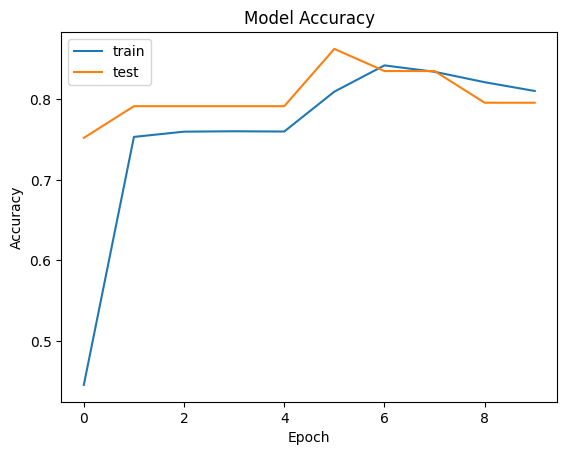

In [49]:
# Visualize Accuracy
plt.plot(qnn_history.history['hinge_accuracy'])
plt.plot(qnn_history.history['val_hinge_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'],loc="best")
plt.show()

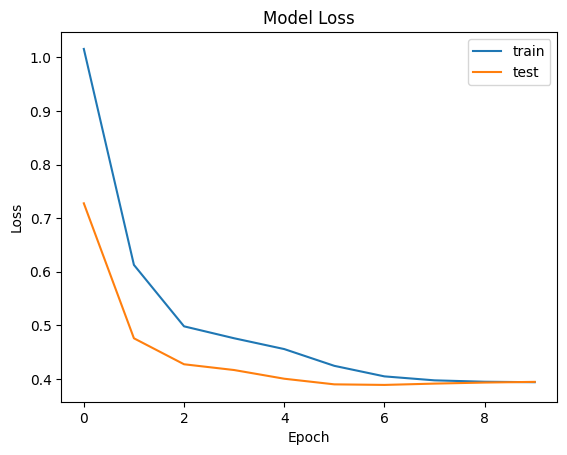

In [50]:
# Visualize Loss
plt.plot(qnn_history.history['loss'])
plt.plot(qnn_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','test'],loc="best")
plt.show()

# ***Save The Model Weights***

In [51]:
#Saving the weights
model.save_weights('/content/sample_data/QModelWeights')